数学与机器学习基础

# 线性代数基础

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [19]:
A = np.array([  [1, 0, 0],
                [0, 1, 0],
                [1, 1, 0] ])

b = np.array([1, 1, 1])

print('A :\n',A)
print('A.T :\n',A.T)
print('b :',b)
print('np.dot(A.T,b) :\n',np.dot(A.T, b))
# array([2, 2, 0])


A :
 [[1 0 0]
 [0 1 0]
 [1 1 0]]
A.T :
 [[1 0 1]
 [0 1 1]
 [0 0 0]]
b : [1 1 1]
np.dot(A.T,b) :
 [2 2 0]


In [20]:
A = np.array([  [1, 0, 0],
                [0, 1, 0] ])
b = np.array([2, 2, 0])

# array([2, 2])
print('A :\n',A)
print('A.T :\n',A.T)
print('b :',b)
print('np.dot(A,b) :\n',np.dot(A, b))

A :
 [[1 0 0]
 [0 1 0]]
A.T :
 [[1 0]
 [0 1]
 [0 0]]
b : [2 2 0]
np.dot(A,b) :
 [2 2]


# 对称矩阵的性质

# 概率论

- [协方差1](https://zhuanlan.zhihu.com/p/37609917)
- [协方差2](https://blog.csdn.net/GoodShot/article/details/79940438)

In [21]:
# 对于离散随机变量 ，有经典的伯努利分布(两点分布或0-1分布)
def bornulli(p):
    return 1 if np.random.rand() > p else 0

In [22]:
# 对于连续随机变量 ，经典的分布有高斯分布
def gaussian(mu, std):
    return np.random.normal(mu, std)

# 重要性采样（不是很懂2020.1.18）

重要性采样 （ Importance Sampling ）是统计中的一种采样方法。 在强化学习中经常用到这种采样方法，它主要用在一些难以直接采样的数据分布上。采样是统计中常见的一种手法，有时我们需要从某个分布中采样一些数据，并利用这些数据完成更多的运算。 



我们分别使用三个分布近似原始分布，共完成三组实验 。 每一组实验中取出一个分布进行重要性采样的计算，共进行十轮计算 。 每一轮计算进行 100000 次采样，并将所有的采样值直接加和 。 最终将十轮计算结果聚合统计，得到它们的均值和标准差，然后对比三组实验的结果 。

$$
f(x)=\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(x-\mu)^2}{2\sigma^2})
$$

In [27]:
def gaussian(x, u, sigma):
    """ 获得高斯函数值"""
    return math.exp(-(x - u) ** 2 / (2 * sigma * sigma)) / math.sqrt(2 * math.pi * sigma * sigma)

In [37]:
def importance_sampling_test(ori_sigma, sample_sigma):
    origin = []  # 记录10次计算的 sum
    for n in range(10):
        sum = 0
        for i in range(100000):
            a = np.random.normal(1.0, ori_sigma)  # mu, sigma 均值为1的正态分布
            sum += a
        origin.append(sum)

    isample = []
    for n in range(10):
        sum2 = 0
        for i in range(100000):
            a= np.random.normal(1.0, sample_sigma) # 均值为1，sigma为sample的正态分布
            ua = gaussian(a, 1.0, sample_sigma)
            na = gaussian(a, 1.0, ori_sigma)
            sum2 += a * na / ua
        isample.append(sum2)

    origin = np.array(origin)
    isample = np.array(isample)
    print('ori_sigma    = ',ori_sigma)
    print('sample_sigma = ',sample_sigma)
    print('orign  mean : ',np.mean(origin),', orign  std : ', np.std(origin), ', len(): ',len(origin))
    print('sample mean : ', np.mean(isample),', sample std : ',  np.std(isample), ', len(): ',len(isample))
    #print('delta mean :',np.mean(origin)-np.mean(isample),   'delta  std : ', np.std(origin)-np.std(isample))
    print('-------------------------')

In [38]:
# 运行主函数
importance_sampling_test(1.0, 1.0)
importance_sampling_test(1.0, 0.5)
importance_sampling_test(1.0, 2)

xs = np.linspace(-5, 6, 301)  # 从-5到6制造了301个数据
y1 = [gaussian(x, 1.0, 1.0) for x in xs]
y2 = [gaussian(x, 1.0, 0.5) for x in xs]
y3 = [gaussian(x, 1.0, 2) for x in xs]

ori_sigma    =  1.0
sample_sigma =  1.0
orign  mean :  100118.69596551763 , orign  std :  213.52637227063707 , len():  10
sample mean :  100132.43162244275 , sample std :  336.51192027816614 , len():  10
-------------------------
ori_sigma    =  1.0
sample_sigma =  0.5
orign  mean :  99895.18161613414 , orign  std :  244.21076201080285 , len():  10
sample mean :  88644.84535195996 , sample std :  27999.50234908888 , len():  10
-------------------------
ori_sigma    =  1.0
sample_sigma =  2
orign  mean :  100047.2409917509 , orign  std :  239.07199059418747 , len():  10
sample mean :  100024.10020669576 , sample std :  410.2374141431247 , len():  10
-------------------------


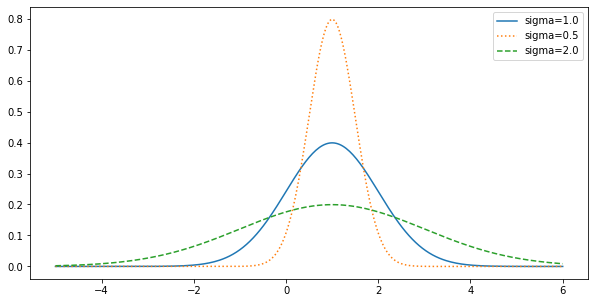

In [39]:
fig = plt.figure(figsize=(10,5))
plt.plot(xs, y1, label='sigma=1.0')
plt.plot(xs, y2, label='sigma=0.5', linestyle=':')
plt.plot(xs, y3, label='sigma=2.0', linestyle='--')
plt.legend()

# 信息论基础


$$ f(x) = -log_2x $$

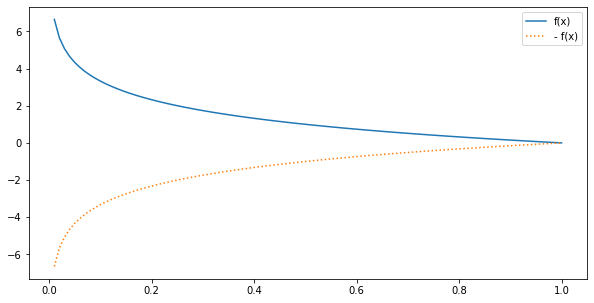

In [11]:
x = np.linspace(0.01, 1, 101)
y = -1*np.log2(x)
fig = plt.figure(figsize=(10,5))
plt.plot(x, y, label='f(x)')
plt.plot(x, -1*y, label='- f(x)', linestyle=':')
plt.legend()

$$entropy = -\sum_{x} p(x)logp(x)$$
$$entropy = -\int_{x}p(x)logp(x)dx$$

假设手里有一枚硬币， 硬币有字一面朝上的概率为 p，所以花一面朝上的概率为 1-p。 知道这些就可以写出求这个问题熵的公式:

$$entropy = -plogp-(1-p)log(1-p)$$

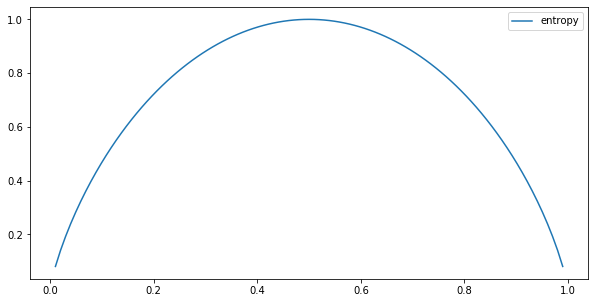

In [14]:
x = np.linspace(0.01, 0.99, 101)  # x就是概率p
y = -x * np.log2(x) -(1-x) * np.log2(1-x)
fig = plt.figure(figsize=(10,5))
plt.plot(x,y, label='entropy')
plt.legend()

# KL散度

KL 散度是概率论和信息论中十分重要的一个概念 。 它是描述两个概率分布 P和Q 差异的一种方法

$$KL(p||q) = \sum p(x) log \frac{p(x)}{q(x)}$$
$$KL(p||q) = \int p(x) log \frac{p(x)}{q(x)}$$

KL 散度可以很好地测量两个概率分布之间的距离 。 两个分布越接近， KL 散度越小； 两个分布越远， KL 散度就越大 。

最小值对应索引 [15, 24]
KL 最小值为 :  0.0001434291347262029  =  0.0001434291347262029
sigma =  1.012
mu    =  0.0


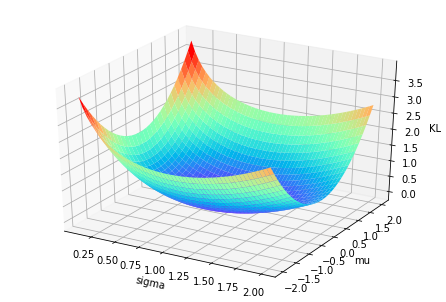

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
x_sigma = np.linspace(0.1, 2, 51)  # sigma
y_mu    = np.linspace(-2, 2, 31)  # mu
X_sigma,Y_mu = np.meshgrid(x_sigma,y_mu)
Z_KL = -np.log(X_sigma)+ 0.5*(X_sigma*X_sigma+Y_mu*Y_mu)-0.5



KL_min = Z_KL.min()  # KL最小值
min_id = Z_KL.argmin()  # 最小值对应的索引值
row, col = Z_KL.shape  # 数据的行列宽度

iR,iC = min_id//col, min_id%col  # 最小值对应的行列索引值

print('最小值对应索引 [%d, %d]'%(iR,iC))
print('KL 最小值为 : ', Z_KL[iR,iC], ' = ', KL_min)
print('sigma = ', X_sigma[iR,iC])
print('mu    = ', Y_mu[iR,iC])


# 画图
ax.plot_surface(X_sigma, Y_mu, Z_KL, rstride=1,cstride=1,cmap='rainbow')  # 画曲面

ax.scatter(X_sigma[iR,iC], Y_mu[iR,iC], Z_KL[iR,iC], color="r") # 画最低点[散点图]
ax.set_xlabel('sigma');
ax.set_ylabel('mu');
ax.set_zlabel('KL');
#plt.show()


# 凸函数及其性质

要介绍凸函数 ，首先要介绍凸集 。 

如果一个集合 C 被称为凸集，那么这个集合中的任意两点间的线段仍然包含在集合中，如果用形式化的方法描述 ， 那么对于任意两
个点 $x_1,x_2  \in C$，和任意一个处于 [0,1] 的实数 $\theta$ ，都有

$$ \theta x_1 + (1-\theta)x_2 \in C$$


凸函数的定义域就是一个凸集，除此之外，它还具备另外一个性质：给定函数中任意两点 $ x,y $，和任意一个处于 [0,1] 的实数 $\theta$ ，有

$$ f(\theta x + (1-\theta)y) \leq  \theta f(x) + (1-\theta)f(y) $$

凸函数满足的这个不等式也被称为 Jensen 不等式。

要判定一个函数是不是凸函数，除了用 Jensen 不等式来判定，还可以用下面两种方式判定 。

首先是一阶导数条件。 令 $x,y$ 是凸函数 $f$ 的任意两个点，那么下式成立 ：

$$ f(y) \geq f(x) + \nabla f(x)^T(y-x) $$


其次是二阶导数条件 ： 令 $x$ 是凸函数 $f$ 上的任意一点，那么下式成立：

$$ \nabla^2f(x) \geq 0 $$

# 机器学习的基本概念

用 Python 的 scikit-leam 工具包随机生成一个可以可视化的回归问题数据集

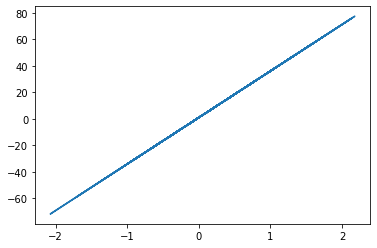

In [49]:
import sklearn.datasets as d


reg_data = d.make_regression(100, 1, 1, 1, 1.0)  # 产生一个随机回归问题
plt.plot(reg_data[0], reg_data[1])

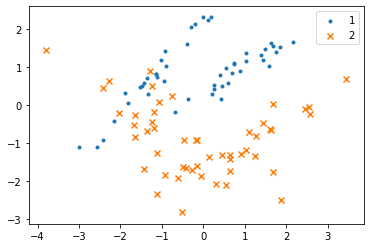

In [50]:
x,y = d.make_classification(100, 2, 2, 0, 0, 2)
pos_x = x[y==1]
plt.scatter(pos_x[:,0], pos_x[:,1], label = '1',marker='.')
neg_x = x[y==0]
plt.scatter(neg_x[:,0], neg_x[:,1], label = '2', marker='x')
plt.legend()

# 机器学习的目标函数


常见的损失函数有**平方损失函数**和**交叉熵损失函数**。

平方损失函数是一种比较容易理解的损失函数，它直接衡量了模型输出和标准答案在数值上的差距 。 定义模型输出的向量为 $y$ ，训练数据的标签向量为 $t$，那么平方损失函数的定义为

$$SquareLoss = \frac{1}{2} (y-t)^2$$

熵这个概念衡量了一个随机变量带来的“惊喜度”，它通过计算每一个取值的惊喜度汇总得到 。 实际上，这个公式的计算涉及两个部分一－**惊喜度＋汇总** 。 如果惊喜度的计算使用一个概率分布，而汇总使用另一个概率分布，那么结果会变成什么样子呢？这就是交叉熵要表达的内容 。

举一个简单的例子，有两个服从伯努利分布的随机变量 $P$ 和 $Q$ ，它们的交叉熵 $H(P,Q)$ 为：

$$ H(P,Q) = -P(0)logQ(0) - (1-P(0))log(1-Q(0)) $$

回顾第5节`信息论基础`中讲熵的部分

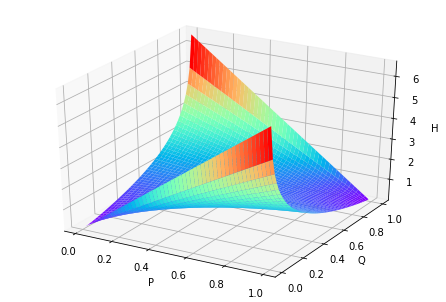

In [51]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.linspace(0.01,0.99,51)
Y = np.linspace(0.01,0.99,51)
X,Y = np.meshgrid(X,Y)
Z = -X * np.log2(Y) - (1-X)* np.log2(1 - Y)
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap='rainbow')

ax.set_xlabel('P');
ax.set_ylabel('Q');
ax.set_zlabel('H');

当两个分布的取值完全相同时，交叉熵的取值最小 。 

对于损失函数来说，当然是希望模型输出和数据标签相同，因此损失函数的目标就是让交叉恼尽可能地变小 。 在这一点上函数和目标是一致的 。

看上去两个损失函数的目标是差不多的，那么该如何应用它们呢？ 一般来说： 

- 如果最终输出的结果是回归问题的一个连续型变量 ，使用平方损失函数更合适；
- 如果最终输出是分类问题的一个离散 Ont-Hot 向量 ，那么交叉熵损失函数更合适 。



但是，看上去平方损失函数既可以做回归问题的损失函数，又可以做分类问题的损失函数，因为它们都可以用距离来衡量 ，那么平方损失函数在做分类问题的损失函数时有什么弱点呢？

这个问题可以从两个方面回答 。 一方面，直观上看，平方损失函数对每一个输出结果都十分看重，而交叉熵损失函数只看重正确分类的结果 。 

假设我们遇到了一个三分类问题，模型的输出自然是－个三维的实数向量$(a,b,c)$ ，向量的每－个元素都表示了对这个类别的预测概率，假设数据的真实结果为$(1,0,0)$，那么两个损失函数的公式为

$$ SquareLoss = (a-1)^2 +(b-0)^2 +(c-0)^2 = (a-1)^2 +b^2+c^2  $$

$$ CrossEntropyLoss = -1 \times loga -0 \times logb - 0 \times logc = -loga $$

除了让正确分类尽可能变大，平方损失函数还会让错误分类都变得更平均，但实际中后面这个调整是不必要的，所以平方损失实际上完成了额外的
工作，因此它的实用性就显得没那么强了 。 但是话说回来 ， 这个考虑在回归问题上显得非常重要，因此在回归问题上交叉熵损失显然就不合适了。

另一方面，从理论角度分析，两个损失函数的源头不一样 。 **平方损失函数假设最终结果都服从高斯分布(???不是很明白)**，而高斯分布实际上是一个连续变量，并不是一个离散变量 。 如果
假设结果变量服从均值为 $t$，方差为 $\sigma$ 的高斯分布，那么利用最大似然法就可以优化它的负对数似然，公式最终变为：

$$ = max \sum_{i}^{N}[ -\frac{1}{2}log(2\pi\sigma^2) - \frac{(t_i - y)^2}{2\sigma^2} ] $$

除去与 $y$ 无关的项目， 最终剩下来的公式就是平方损失函数的形式 。

--- 

高斯分布：
$$
f(x)=\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(x-t)^2}{2\sigma^2})
$$